# Initialization of the Kalman Filter

In [1]:
using Distributions, Compat, Plots, Random, DataFrames
upscale = 1.1
gr()
default(line = (:line, 0.5, 1, 2), size=(800*upscale,600*upscale))
#default(dpi = 100)
default(dpi = 500)

In [2]:
upper_bound = 20
noise() = rand(Normal(0, 2), upper_bound)

x = collect(1:upper_bound)
y = x + noise();

In [3]:
include("../KalmanFilter.jl")
import .KalmanFilter

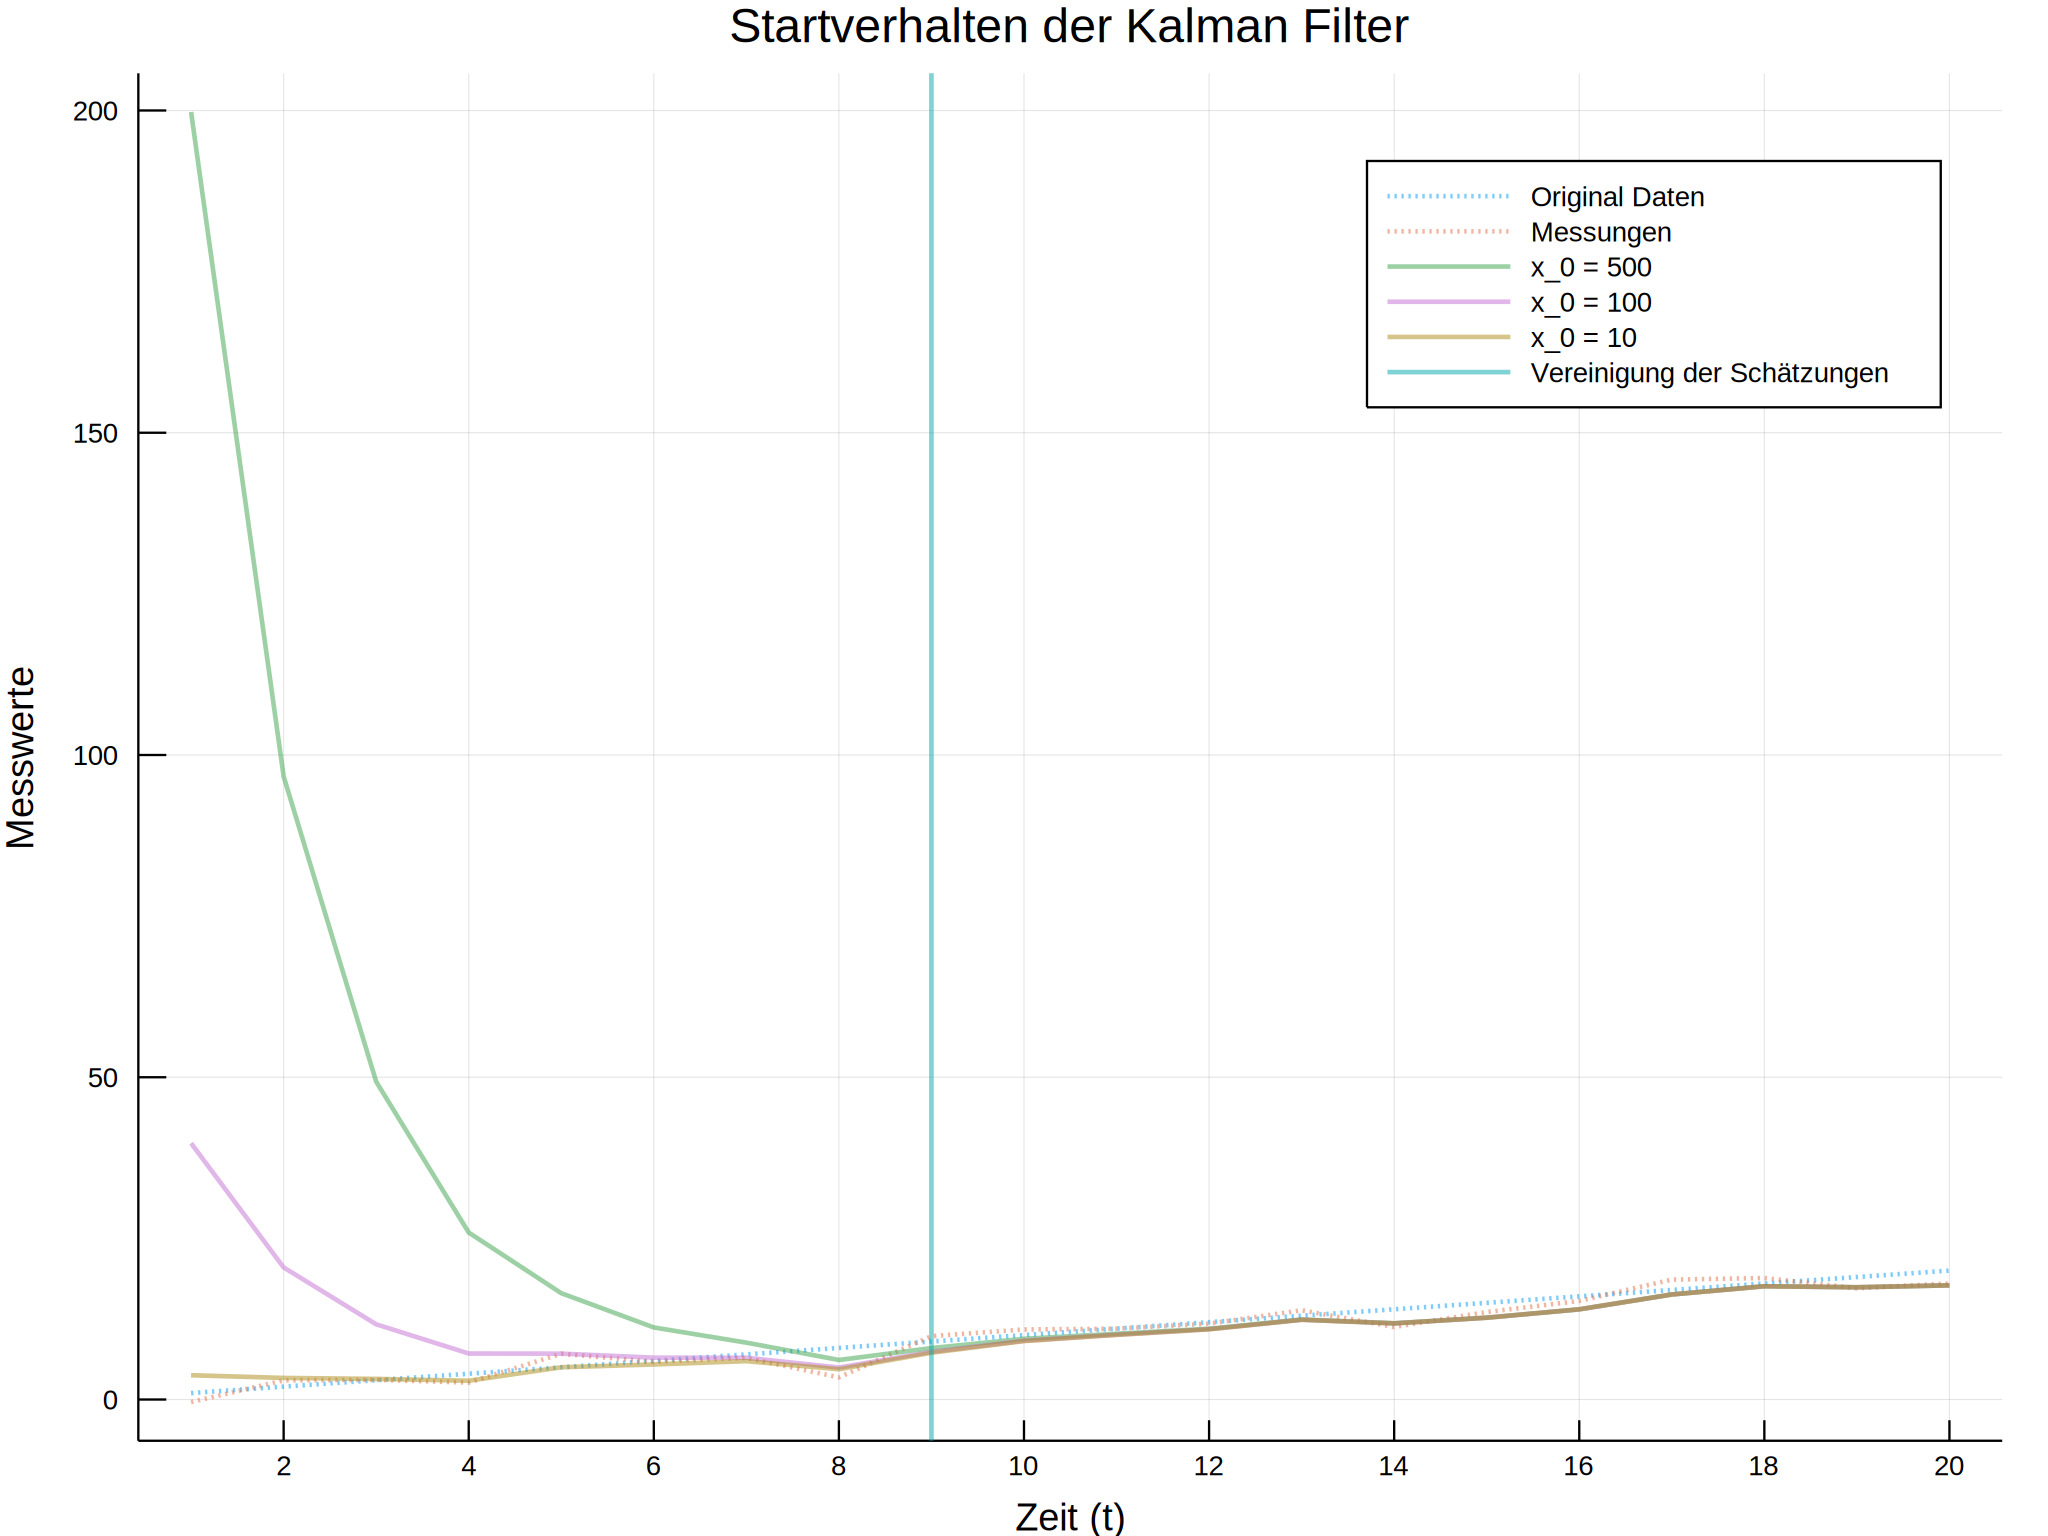

In [4]:
plot_init = plot(title = "Startverhalten der Kalman Filter", xlabel = "Zeit (t)", ylabel = "Messwerte", xticks = 0:2:20)

A = 1
Q = 1
G = 1
R = 2
Σ = 2
model1 = KalmanFilter.Kalman(A, Q, G, R, 500, Σ)
model2 = KalmanFilter.Kalman(A, Q, G, R, 100, Σ)
model3 = KalmanFilter.Kalman(A, Q, G, R, 10, Σ)
x_out = DataFrame(A = Float64[], B = Float64[], C = Float64[])
for i = y
    out1 = KalmanFilter.next(model1, i)
    out2 = KalmanFilter.next(model2, i)
    out3 = KalmanFilter.next(model3, i)
    model1 = out1.model
    model2 = out2.model
    model3 = out3.model
    push!(x_out, (out1.fusioned, out2.fusioned, out3.fusioned))
end

plot!(x, label = "Original Daten", linestyle = :dot)
plot!(y, label = "Messungen", linestyle = :dot)
plot!(x_out[:A], label = "x_0 = 500")
plot!(x_out[:B], label = "x_0 = 100")
plot!(x_out[:C], label = "x_0 = 10")
vline!([9], label = "Vereinigung der Schätzungen")
png("plot-startzustand.png")
plot_init

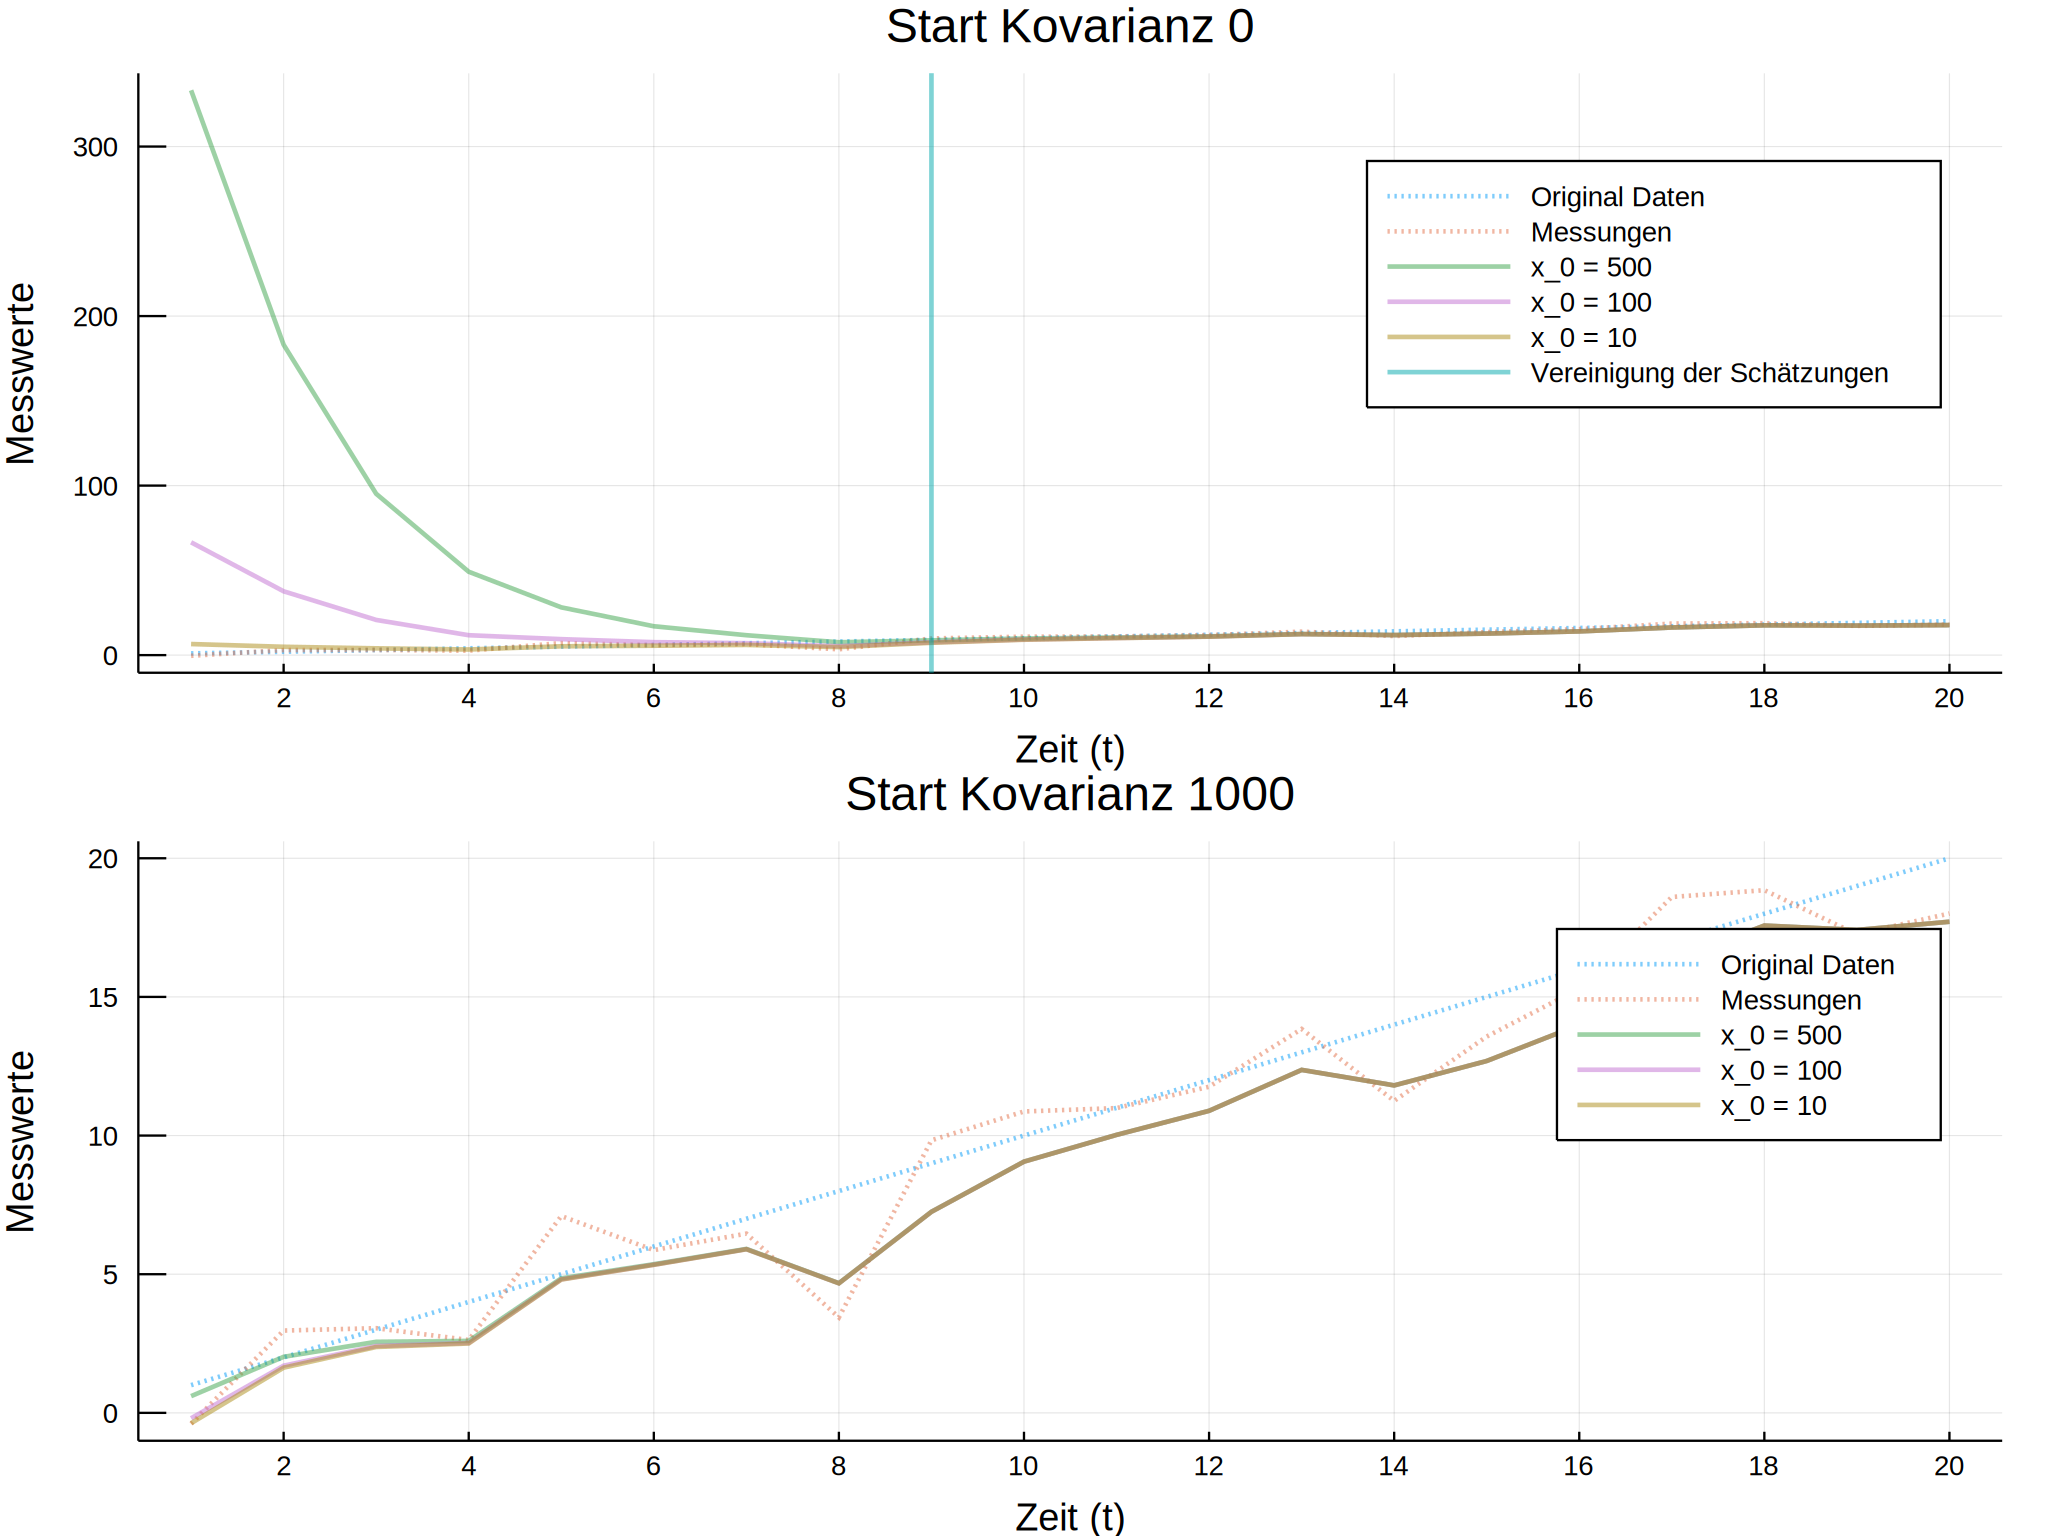

In [5]:
plot_small_cov = plot(title = "Start Kovarianz 0", xlabel = "Zeit (t)", ylabel = "Messwerte", xticks = 0:2:20)

A = 1
Q = 1
G = 1
R = 2
Σ = 0
model1 = KalmanFilter.Kalman(A, Q, G, R, 500, Σ)
model2 = KalmanFilter.Kalman(A, Q, G, R, 100, Σ)
model3 = KalmanFilter.Kalman(A, Q, G, R, 10, Σ)
x_out = DataFrame(A = Float64[], B = Float64[], C = Float64[])
for i = y
    out1 = KalmanFilter.next(model1, i)
    out2 = KalmanFilter.next(model2, i)
    out3 = KalmanFilter.next(model3, i)
    model1 = out1.model
    model2 = out2.model
    model3 = out3.model
    push!(x_out, (out1.fusioned, out2.fusioned, out3.fusioned))
end

plot!(x, label = "Original Daten", linestyle = :dot)
plot!(y, label = "Messungen", linestyle = :dot)
plot!(x_out[:A], label = "x_0 = 500")
plot!(x_out[:B], label = "x_0 = 100")
plot!(x_out[:C], label = "x_0 = 10")
vline!([9], label = "Vereinigung der Schätzungen")

plot_large_cov = plot(title = "Start Kovarianz 1000", xlabel = "Zeit (t)", ylabel = "Messwerte", xticks = 0:2:20)
A = 1
Q = 1
G = 1
R = 2
Σ = 1000
model1 = KalmanFilter.Kalman(A, Q, G, R, 500, Σ)
model2 = KalmanFilter.Kalman(A, Q, G, R, 100, Σ)
model3 = KalmanFilter.Kalman(A, Q, G, R, 10, Σ)
x_out = DataFrame(A = Float64[], B = Float64[], C = Float64[])
for i = y
    out1 = KalmanFilter.next(model1, i)
    out2 = KalmanFilter.next(model2, i)
    out3 = KalmanFilter.next(model3, i)
    model1 = out1.model
    model2 = out2.model
    model3 = out3.model
    push!(x_out, (out1.fusioned, out2.fusioned, out3.fusioned))
end

plot!(x, label = "Original Daten", linestyle = :dot)
plot!(y, label = "Messungen", linestyle = :dot)
plot!(x_out[:A], label = "x_0 = 500")
plot!(x_out[:B], label = "x_0 = 100")
plot!(x_out[:C], label = "x_0 = 10")

p = plot(plot_small_cov, plot_large_cov, layout = @layout [a;b] )
png("plot-start-kovarianz.png")
p